In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

#__DATA LOADING AND PRELIMINARY DATA EXPLORATIONS AND CLEANING____________
royal_diag = pd.read_csv('Diagnoses_list.csv')
royal_diag.shape

(9612, 11)

In [3]:
#dropiing unwanted columns

royal_diag = royal_diag.drop(columns=['pat_contacts', 'ICD-CODE', 'pat_address', 'pat_contacts'])
royal_diag.shape

(9612, 8)

In [5]:
royal_na = royal_diag.dropna() #droping all NaN
royal_na.shape

(9295, 8)

In [6]:
royal_na.isna().values.any() # The data is clean, free from missing values

np.False_

In [9]:
#________ change OPD-DOCTOR to OUT-PATIENT, TREAT SELF-REQUEST AS OUT-PATIENT TO_____________
royal_na['round_name'] = royal_na['round_name'].replace({'OPD-DOCTOR': 'OUT-PATIENT', 'SELF REQUEST': 'IN-PATIENT'})
print(f" There are: {royal_na['round_name'].nunique()} unique values")

 There are: 2 unique values


C:\Users\DATICOM LITE\AppData\Local\Temp\ipykernel_2944\1977663748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  royal_na['round_name'] = royal_na['round_name'].replace({'OPD-DOCTOR': 'OUT-PATIENT', 'SELF REQUEST': 'IN-PATIENT'})


In [10]:
#_________check for gender______
royal_na.pat_gender.nunique()

3

In [16]:
# clean the gender col to only return male and female
royal_na['pat_gender'] = royal_na['pat_gender'].replace({'M': 'Male', 'F': 'Female'})
royal_na.head()

#check again
#clean_royal.pat_gender.nunique()


C:\Users\DATICOM LITE\AppData\Local\Temp\ipykernel_2944\592545495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  royal_na['pat_gender'] = royal_na['pat_gender'].replace({'M': 'Male', 'F': 'Female'})


,Daignosis Date,round_name,pat_full_name,pat_gender,Date Of Birth,Age At Diagnoses,diag_name,diagID
0,02-Jul-21,OUT-PATIENT,Kulabika Teopista,Female,01-Jan-46,75.0,"Pneumonia due to staphylococcus, unspecified",4007
2,03-Jul-21,OUT-PATIENT,Ipyella Christine,Female,01-Jan-83,38.0,"Secondary hypertension, unspecified",2985
3,04-Jul-21,OUT-PATIENT,Badibona Siraj,Male,01-Jan-76,45.0,SARS-COV2,9935
4,04-Jul-21,OUT-PATIENT,Badibona Siraj,Male,01-Jan-76,45.0,post cov lung fibrosis,9936
5,04-Jul-21,OUT-PATIENT,Badibona Siraj,Male,01-Jan-76,45.0,Renovascular hypertension,2981


In [17]:
royal_na.pat_gender.nunique()

3

In [18]:
#Clean up the gender col
clean_data = royal_na[royal_na['pat_gender'].isin(['Male', 'Female'])]

In [21]:
print(f" There are {clean_data.pat_gender.nunique()} unique values that is, Male and Female")

 There are 2 unique values that is, Male and Female


In [ ]:
"""
Study Questions Under Consideration
===================================
1. How many Male and Female Out-Patient and In-Patients do we have?
2. What is the Total Number of Male and Female per diagnosis?
3. Conduct a normal distribution of diagnoses of Males and Females over time
___________________________________
"""


In [22]:
# 1. How many Male and Female Out-Patient and In-Patients do we have?

patient_count = clean_data.groupby(['pat_gender', 'round_name']).size().reset_index(name='count')
patient_count


,pat_gender,round_name,count
0,Female,IN-PATIENT,960
1,Female,OUT-PATIENT,5368
2,Male,IN-PATIENT,387
3,Male,OUT-PATIENT,2556


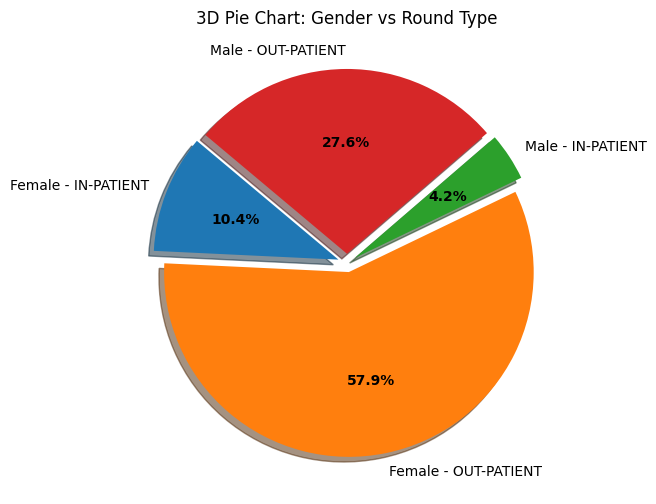

In [23]:
# THE VISUAL REPRESENTATION OF THE ABOVE

# Prepare the data
grouped = clean_data.groupby(['pat_gender', 'round_name']).size().reset_index(name='count')
labels = grouped['pat_gender'] + ' - ' + grouped['round_name']
sizes = grouped['count']

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Create pie chart with 3D feel
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=[0.05]*len(sizes)  
)

plt.setp(autotexts, size=10, weight="bold")
ax.set_title("3D Pie Chart: Gender vs Round Type")
plt.show()

In [26]:
# 2. What is the Total Number of Male and Female per diagnosis?

top_diagnoses = clean_data.groupby(['pat_gender', 'diag_name']).size().reset_index(name='Count')

#Filter top20 diagnoses
top20_female = top_diagnoses[top_diagnoses['pat_gender'] == 'Female'].nlargest(20, 'Count')
top20_male = top_diagnoses[top_diagnoses['pat_gender'] == 'Male'].nlargest(20, 'Count')

#Combine for comparison
top20_combined = pd.concat([top20_female, top20_male])
top20_combined

,pat_gender,diag_name,Count
1792,Female,uti,181
426,Female,Essential (primary) hypertension,179
1560,Female,UTI in pregnancy,127
109,Female,ACUTE GASTRITIS,111
635,Female,Gastritis with GERD,106
1528,Female,Typhoid fever,104
1165,Female,PID,83
1547,Female,UTI,79
1534,Female,URTI,64
835,Female,MALARIA,60


In [35]:
mask = top20_combined['diag_name'].str.fullmatch(r'uti', case=False, na=False)
top20_combined.loc[mask, 'diag_name'] = 'UTI'

# Then group
top20_cleaned = top20_combined.groupby(['pat_gender', 'diag_name'])['Count'].sum().reset_index()
top20_final = top20_cleaned.sort_values('Count', ascending=False)


#The Most frequent Diagnoses carried out
top20_final

,pat_gender,diag_name,Count
15,Female,UTI,260
4,Female,Essential (primary) hypertension,179
17,Female,UTI in pregnancy,127
1,Female,ACUTE GASTRITIS,111
24,Male,Essential (primary) hypertension,110
5,Female,Gastritis with GERD,106
13,Female,Typhoid fever,104
35,Male,UTI,93
8,Female,PID,83
14,Female,URTI,64


In [36]:
#Most frequent Diagnoses among Females
female_diag = top20_cleaned[top20_cleaned['pat_gender'] == 'Female'].sort_values(by='Count', ascending=False)
female_diag

,pat_gender,diag_name,Count
15,Female,UTI,260
4,Female,Essential (primary) hypertension,179
17,Female,UTI in pregnancy,127
1,Female,ACUTE GASTRITIS,111
5,Female,Gastritis with GERD,106
13,Female,Typhoid fever,104
8,Female,PID,83
14,Female,URTI,64
7,Female,MALARIA,60
16,Female,UTI in early pregnancy,59


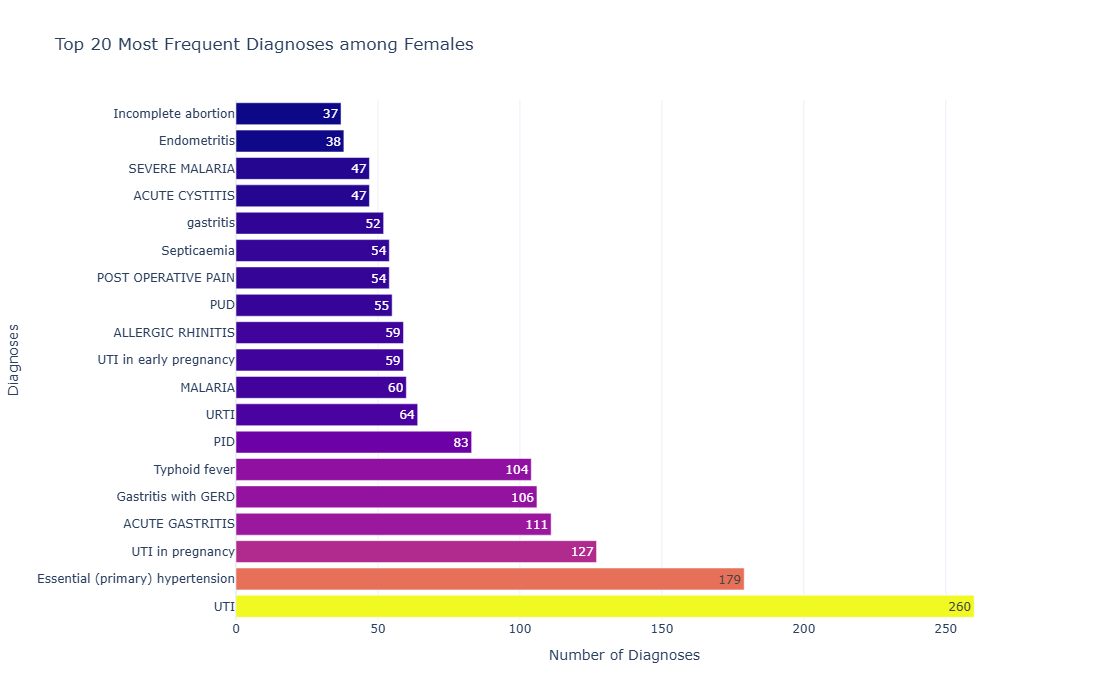

In [44]:
#Visual representation of Most frequently diagnosed among females using a bar chart

fem_bar = px.bar(female_diag,
                 x = 'Count',
                 y = 'diag_name',
                 orientation = 'h',
                 color = 'Count',
                 template = 'plotly_white',
                 height = 700,
                 text = 'Count',
                 title = ' Top 20 Most Frequent Diagnoses among Females'
                )
fem_bar.update_layout(xaxis_title = 'Number of Diagnoses',
                      yaxis_title = 'Diagnoses',
                      coloraxis_showscale =False
                     )
fem_bar.show()

In [39]:
#Most frequent Diagnoses among Males
male_diag = top20_cleaned[top20_cleaned['pat_gender'] == 'Male'].sort_values(by='Count', ascending=False)
male_diag

,pat_gender,diag_name,Count
24,Male,Essential (primary) hypertension,110
35,Male,UTI,93
20,Male,ACUTE GASTRITIS,59
33,Male,Typhoid fever,53
27,Male,MALARIA,50
34,Male,URTI,49
25,Male,Gastritis with GERD,47
30,Male,SEVERE MALARIA,41
31,Male,Septicaemia,38
28,Male,PUD,35


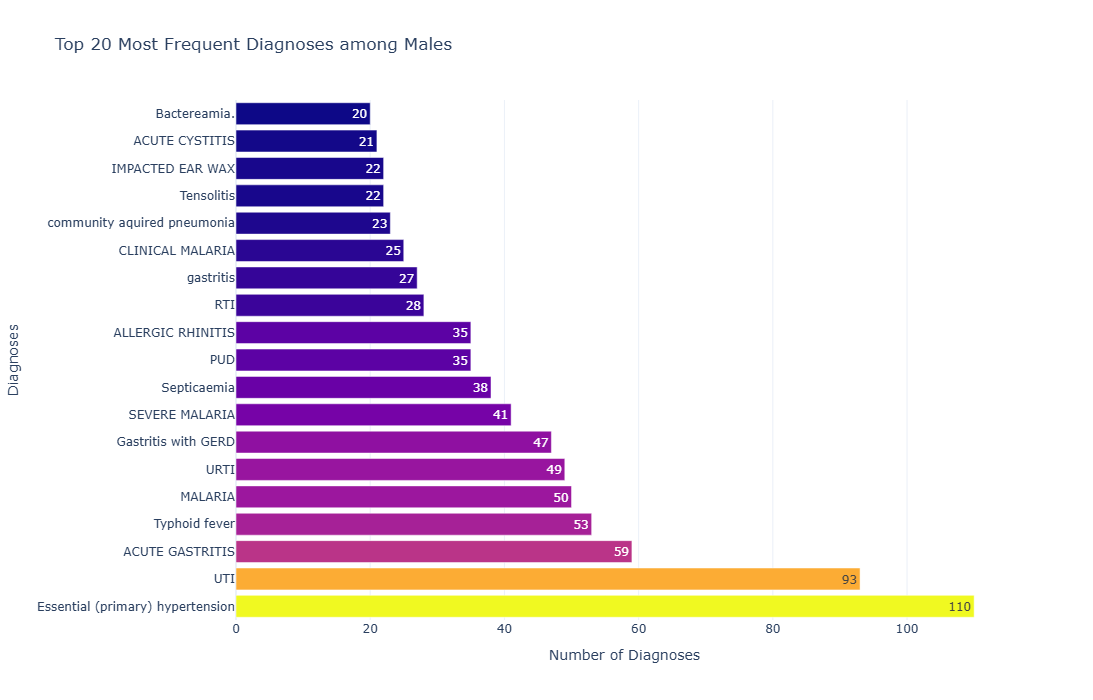

In [42]:
#Visual representation of Most frequently diagnosed among males using a bar chart

mal_bar = px.bar(male_diag,
                 x = 'Count',
                 y = 'diag_name',
                 orientation = 'h',
                 color = 'Count',
                 template = 'plotly_white',
                 height = 700,
                 text = 'Count',
                 title = ' Top 20 Most Frequent Diagnoses among Males'
                )
mal_bar.update_layout(xaxis_title = 'Number of Diagnoses',
                      yaxis_title = 'Diagnoses',
                      coloraxis_showscale =False
                     )
mal_bar.show()

In [ ]:
"""3. Conduct a normal distribution of diagnoses of Males and Females over time"""

#drop unnecessary cols 

distribution = clean_data.drop(columns[''])

In [45]:
clean_data.columns

Index(['Daignosis Date', 'round_name', 'pat_full_name', 'pat_gender',
       'Date Of Birth', 'Age At Diagnoses', 'diag_name', 'diagID'],
      dtype='object')

In [49]:
select_columns = ['Daignosis Date', 'round_name', 'pat_gender', 'Age At Diagnoses', 'diag_name']
normal_df = clean_data[select_columns].copy()
normal_df.head()

,Daignosis Date,round_name,pat_gender,Age At Diagnoses,diag_name
0,02-Jul-21,OUT-PATIENT,Female,75.0,"Pneumonia due to staphylococcus, unspecified"
2,03-Jul-21,OUT-PATIENT,Female,38.0,"Secondary hypertension, unspecified"
3,04-Jul-21,OUT-PATIENT,Male,45.0,SARS-COV2
4,04-Jul-21,OUT-PATIENT,Male,45.0,post cov lung fibrosis
5,04-Jul-21,OUT-PATIENT,Male,45.0,Renovascular hypertension


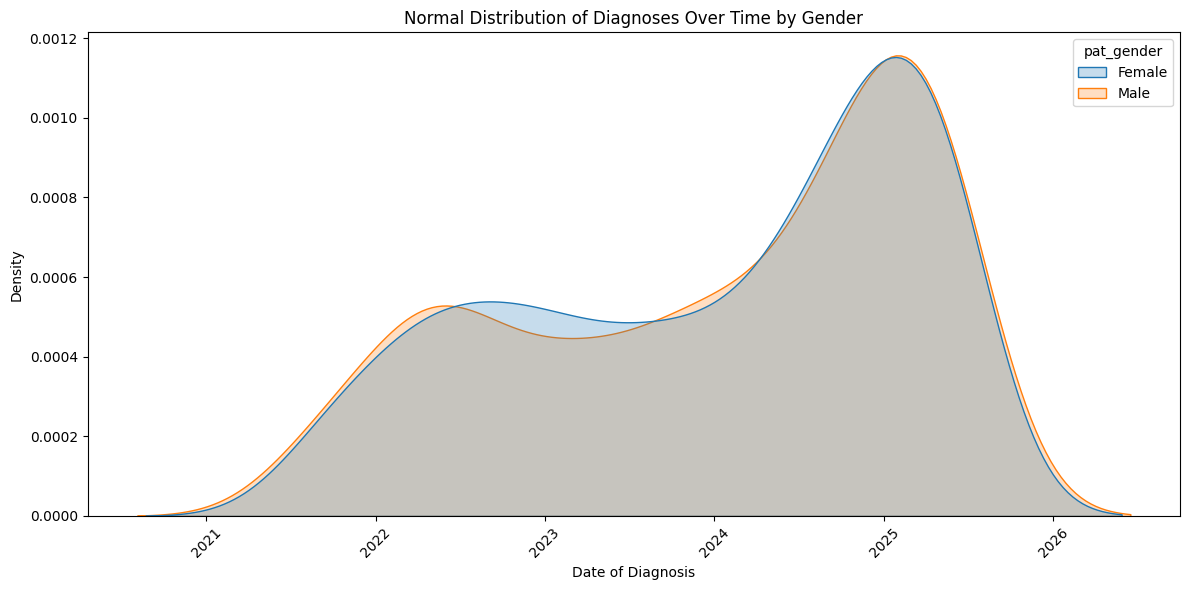

In [52]:

import seaborn as sns


# Step 1: Convert date col to datetime
#normal_df['Daignosis Date'] = pd.to_datetime(normal_df['Daignosis Date'], dayfirst=True)
normal_df['Daignosis Date'] = pd.to_datetime(normal_df['Daignosis Date'], format='%d-%b-%y')


# Step 2: Group by gender and date, and count diagnoses
gender_daily = normal_df.groupby(['pat_gender', 'Daignosis Date']).size().reset_index(name='diagnosis_count')

# Step 3: Plot KDE (normal distribution) of diagnosis counts over time for each gender
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=gender_daily,
    x='Daignosis Date',
    weights='diagnosis_count',
    hue='pat_gender',
    fill=True,
    common_norm=False
)
plt.title("Normal Distribution of Diagnoses Over Time by Gender")
plt.xlabel("Date of Diagnosis")
plt.ylabel("Density")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
